<h1 align="center">Data Science Capstone: Final Assignment Submission</h1>

<hr>

<h2 align="center">Analysis and Reporting Data</h2>
<h2 align="center">Assignment By: Derek Evans</h2>
<h2 align="center">Submitted On: Jan. 20th, 2019</h2>

In [1]:
!pip install foursquare
!conda install -c conda-forge geopy --yes
!pip install folium
import folium
import foursquare
import types
from ibm_botocore.client import Config
import ibm_boto3
from geopy.geocoders import Nominatim
import requests
import pandas as pd
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML
from pandas.io.json import json_normalize
from datetime import datetime, timezone
import pytz
import time
import ibm_db
import ibm_db_dbi
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import preprocessing

Requirement not upgraded as not directly required: foursquare in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from foursquare)
Requirement not upgraded as not directly required: requests>=2.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from foursquare)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.1->foursquare)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.1->foursquare)
Requirement not upgraded as not directly required: urllib3<1.23,>=1.21.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests>=2.1->foursquare)
Requirement not upgraded as not directly required: certifi>=2017.4.17 in /opt/conda/envs/DSX-Python35/lib/pytho

In [2]:
# DATE & TIME VARIABLES
IT = pytz.timezone('America/Creston')
date_now = datetime.now(IT)
date_date = date_now.strftime("%x")
date_time = date_now.strftime("%X")
date_weekday = date_now.strftime("%A")
date_year = date_now.strftime("%Y")
date_month = date_now.strftime("%B")
date_ampm = date_now.strftime("%p")
date_zone = date_now.strftime("%Z")

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
# @hidden
# Create DSN Connection String
dsn = (
       "DRIVER={0};"
       "DATABASE={1};"
       "HOSTNAME={2};"
       "PORT={3};"
       "PROTOCOL={4};"
       "UID={5};"
       "PWD={6};".format(dsn_driver, dsn_database,
                         dsn_hostname, dsn_port, 
                         dsn_protocol, dsn_uid, 
                         dsn_pwd))

try:
    conn = ibm_db.connect(dsn,"", "")
    print("<---- ibm_db API Connected to DataSciDB Database on IBM DB2 Cloud ---->")
    
except:
    print("<---- Unable to Connect to DataSciDB ---->")

<---- ibm_db API Connected to DataSciDB Database on IBM DB2 Cloud ---->


In [5]:
# The code was removed by Watson Studio for sharing.

<---- ibm_db_dbi API Connected to DataSciDB Database on IBM DB2 Cloud ---->


In [6]:
# The code was removed by Watson Studio for sharing.

<---- SELECT * FROM CITY_DATA SQL STATEMENT RESULTS ASSIGNED TO PANDAS DATAFRAME Trending_Data_DF ---->


In [7]:
# The code was removed by Watson Studio for sharing.

<---- SELECT * FROM TRENDING_DATA SQL STATEMENT RESULTS ASSIGNED TO PANDAS DATAFRAME Trending_Data_DF ---->


In [8]:
# The code was removed by Watson Studio for sharing.

<---- SELECT * FROM CITY_DATA SQL STATEMENT RESULTS ASSIGNED TO PANDAS DATAFRAME Updated_Trend_Data_DF ---->


In [9]:
# The code was removed by Watson Studio for sharing.

<---- SELECT * FROM ORIGINAL_CITY_DATA SQL STATEMENT RESULTS ASSIGNED TO PANDAS DATAFRAME Original_City_Data_DF ---->


In [10]:
ibm_db.close(conn)

True

<hr>

<h1 align="center">Original City Data from Web Scraper Notebook</h1>

<hr>

In [11]:
print(query_results_timestamp4)
Original_City_Data_DF[0:len(Original_City_Data_DF)]

SELECT QUERY TIMESTAMP - DATE: 01/21/19 - TIME: 13:55:47


,CITY,STATE,CITY_STATE1,LATITUDE,LONGITUDE,STATE_ID,CITY_STATE2,WIKI_LINK
0,Grand Rapids,Michigan,"Grand Rapids, Michigan",42.961111111111,-85.655555555556,MI,"Grand Rapids, MI United States","https://en.wikipedia.org/wiki/Grand_Rapids,_Mi..."
1,Battle Creek,Michigan,"Battle Creek, Michigan",42.312222222222,-85.204166666667,MI,"Battle Creek, MI United States","https://en.wikipedia.org/wiki/Battle_Creek,_Mi..."
2,Lansing,Michigan,"Lansing, Michigan",42.733611111111,-84.546666666667,MI,"Lansing, MI United States","https://en.wikipedia.org/wiki/Lansing,_Michigan"
3,East Lansing,Michigan,"East Lansing, Michigan",42.734722222222,-84.480555555556,MI,"East Lansing, MI United States","https://en.wikipedia.org/wiki/East_Lansing,_Mi..."
4,Kalamazoo,Michigan,"Kalamazoo, Michigan",42.29,-85.585833333333,MI,"Kalamazoo, MI United States","https://en.wikipedia.org/wiki/Kalamazoo,_Michigan"
5,Detroit,Michigan,"Detroit, Michigan",42.331388888889,-83.045833333333,MI,"Detroit, MI United States","https://en.wikipedia.org/wiki/Detroit,_Michigan"
6,Sterling Heights,Michigan,"Sterling Heights, Michigan",42.580277777778,-83.030277777778,MI,"Sterling Heights, MI United States",https://en.wikipedia.org/wiki/Sterling_Heights...
7,Dearborn,Michigan,"Dearborn, Michigan",42.314444444444,-83.213333333333,MI,"Dearborn, MI United States","https://en.wikipedia.org/wiki/Dearborn,_Michigan"
8,Livonia,Michigan,"Livonia, Michigan",42.397222222222,-83.373611111111,MI,"Livonia, MI United States","https://en.wikipedia.org/wiki/Livonia,_Michigan"
9,Troy,Michigan,"Troy, Michigan",42.580277777778,-83.143055555556,MI,"Troy, MI United States","https://en.wikipedia.org/wiki/Troy,_Michigan"


<hr>

<h1 align="center">Adjusted City Data Modified from Original City Data Generated by the Web Scraper Notebook</h1>

<hr>

In [12]:
print(query_results_timestamp1)
City_Data_DF[0:len(City_Data_DF)]

SELECT QUERY TIMESTAMP - DATE: 01/21/19 - TIME: 13:55:47


,CITY_ID,CITY,STATE,CITY_STATE1,LATITUDE,LONGITUDE,LAT_LONG,CITY_STATE2,WIKI_LINK,STATE_ID,CITY_STATE3,CITY_STATE4,COUNTRY,NE_LAT,NE_LONG,SW_LAT,SW_LONG
0,CID00001,Detroit,Michigan,"Detroit, Michigan",42.331389,-83.045833,"42.33138889, -83.04583333","Detroit,_Michigan",https://en.wikipedia.org/wiki/Detroit_Michigan,MI,"Detroit, MI","Detroit, MI, United States",United States,42.461460,-82.890644,42.239702,-83.310184
1,CID00002,Indianapolis,Indiana,"Indianapolis, Indiana",39.791000,-86.148000,"39.791, -86.148",Indianapolis,https://en.wikipedia.org/wiki/Indianapolis,IN,"Indianapolis, IN","Indianapolis, IN, United States",United States,39.990799,-85.714302,39.529467,-86.553383
2,CID00003,Milwaukee,Wisconsin,"Milwaukee, Wisconsin",43.050000,-87.950000,"43.05, -87.95",Milwaukee,https://en.wikipedia.org/wiki/Milwaukee,WI,"Milwaukee, WI","Milwaukee, WI, United States",United States,43.257206,-87.553139,42.818573,-88.392220
3,CID00004,Madison,Wisconsin,"Madison, Wisconsin",43.066667,-89.400000,"43.06666667, -89.4","Madison,_Wisconsin",https://en.wikipedia.org/wiki/Madison_Wisconsin,WI,"Madison, WI","Madison, WI, United States",United States,43.182399,-89.197826,42.963206,-89.617367
4,CID00005,Saint Paul,Minnesota,"Saint Paul, Minnesota",44.944167,-93.093611,"44.94416667, -93.09361111","Saint_Paul,_Minnesota",https://en.wikipedia.org/wiki/Saint_Paul_Minne...,MN,"Saint Paul, MN","Saint Paul, MN, United States",United States,45.037384,-92.900219,44.824952,-93.319759
5,CID00006,Minneapolis,Minnesota,"Minneapolis, Minnesota",44.983333,-93.266667,"44.98333333, -93.26666667",Minneapolis,https://en.wikipedia.org/wiki/Minneapolis,MN,"Minneapolis, MN","Minneapolis, MN, United States",United States,45.069156,-93.057461,44.856842,-93.477001
6,CID00007,Green Bay,Wisconsin,"Green Bay, Wisconsin",44.513333,-88.015833,"44.51333333, -88.01583333","Green_Bay,_Wisconsin",https://en.wikipedia.org/wiki/Green_Bay_Wisconsin,WI,"Green Bay, WI","Green Bay, WI, United States",United States,44.615645,-87.782307,44.401656,-88.201847
7,CID00008,Boston,Massachusetts,"Boston, Massachusetts",42.358056,-71.063611,"42.35805556, -71.06361111","Boston,_Massachusetts",https://en.wikipedia.org/wiki/Boston_Massachus...,MA,"Boston, MA","Boston, MA, United States",United States,42.440434,-70.858898,42.218602,-71.278439
8,CID00009,San Jose,California,"San Jose, California",37.333333,-121.900000,"37.33333333, -121.9","San_Jose,_California",https://en.wikipedia.org/wiki/San_Jose_California,CA,"San Jose, CA","San Jose, CA, United States",United States,37.523886,-121.413689,37.046409,-122.252769
9,CID00010,San Francisco,California,"San Francisco, California",37.783333,-122.416667,"37.78333333, -122.4166667","San_Francisco,_California",https://en.wikipedia.org/wiki/San_Francisco_Ca...,CA,"San Francisco, CA","San Francisco, CA, United States",United States,37.879189,-122.225819,37.641966,-122.645359


<hr>

<h1 align="center">Trending City Data from Data Collector Notebooks</h1>

<hr>

In [13]:
print(query_results_timestamp2)
Trending_Data_DF[0:len(Trending_Data_DF)]

SELECT QUERY TIMESTAMP - DATE: 01/21/19 - TIME: 13:55:47


,CATEGORIES1,CATEGORIES2,CATEGORIES3,ID,LOCATION.ADDRESS,LOCATION.CC,LOCATION.CITY,LOCATION.COUNTRY,LOCATION.CROSSSTREET,LOCATION.FORMATTEDADDRESS,...,LOCATION.POSTALCODE,LOCATION.STATE,NAME,VENUEPAGE.ID,DATE,TIME,WEEKDAY,YEAR,MONTH,AM_PM
0,Basketball Stadiums,Basketball,Basketball Stadiu,4ad4bff8f964a52002ea20e3,125 S Pennsylvania St,US,Indianapolis,United States,at E Georgia St,"125 S Pennsylvania St (at E Georgia St), India...",...,46204,IN,Bankers Life Fieldhouse,42217987,01/20/19,16:54:07,Sunday,2019,January,PM
1,Convention Centers,Convention Center,Convention Center,blank,US,San Jose,blank,"San Jose, CA 95113, United States",37.329998,-121.889275,...,blank,01/20/19,16:54:07,Sunday,2019,January,PM,blank,blank,blank
2,Movie Theaters,Movie Theater,Movie Theater,19.0,19 movies,4a5824e5f964a5206db71fe3,135 4th St Ste 3000,US,San Francisco,United States,...,nan,37.78457546024026,-122.40323635482677,94103,CA,AMC Metreon 16,01/20/19,16:54:07,Sunday,2019
3,Sports Bars,Sports Bar,Sports Bar,nan,nan,57587782498e1367ff5c38ec,365 11th St,US,San Francisco,United States,...,37.77124505563008,-122.41299663242239,94103,CA,BuzzWorks,01/20/19,16:54:07,Sunday,2019,January
4,Cafés,Café,Café,nan,nan,55554f0a498e7ffc6883325c,1160 Howard St,US,San Francisco,United States,...,37.77701166643817,-122.41089851840502,94103,CA,Vive La Tarte,01/20/19,16:54:07,Sunday,2019,January
5,Basketball Stadiums,Basketball,Basketball Stadiu,4ad4bff8f964a52002ea20e3,125 S Pennsylvania St,US,Indianapolis,United States,at E Georgia St,"125 S Pennsylvania St (at E Georgia St), India...",...,46204,IN,Bankers Life Fieldhouse,42217987,01/20/19,17:16:47,Sunday,2019,January,PM
6,Convention Centers,Convention Center,Convention Center,blank,US,San Jose,blank,"San Jose, CA 95113, United States",37.329998,-121.889275,...,blank,01/20/19,17:16:47,Sunday,2019,January,PM,blank,blank,blank
7,Indie Movie Theaters,Indie Movies,Indie Movie Theater,nan,nan,4089ae00f964a520bff21ee3,429 Castro St,US,San Francisco,United States,...,nan,37.761991717624404,-122.43496924638747,94114,CA,Castro Theatre,01/20/19,17:16:47,Sunday,2019
8,Movie Theaters,Movie Theater,Movie Theater,19.0,19 movies,4a5824e5f964a5206db71fe3,135 4th St Ste 3000,US,San Francisco,United States,...,nan,37.78457546024026,-122.40323635482677,94103,CA,AMC Metreon 16,01/20/19,17:16:47,Sunday,2019
9,Sports Bars,Sports Bar,Sports Bar,nan,nan,57587782498e1367ff5c38ec,365 11th St,US,San Francisco,United States,...,37.77124505563008,-122.41299663242239,94103,CA,BuzzWorks,01/20/19,17:16:47,Sunday,2019,January


<h2 align="center">Restructured Data from Data Retrieval Notebook</h2>

In [14]:
print(query_results_timestamp3)
Updated_Trend_Data_DF[0:len(Updated_Trend_Data_DF)]

SELECT QUERY TIMESTAMP - DATE: 01/21/19 - TIME: 13:55:47


,VENUE_ID,CITY,LAT,LONG,VENUE_NAME,TREND_DATE,TREND_TIME
0,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,16:54:07
1,4a5824e5f964a5206db71fe3,San Francisco,37.78457546024026,-122.40323635482677,AMC Metreon 16,01/20/19,16:54:07
2,57587782498e1367ff5c38ec,San Francisco,37.77124505563008,-122.41299663242239,BuzzWorks,01/20/19,16:54:07
3,55554f0a498e7ffc6883325c,San Francisco,37.77701166643817,-122.41089851840502,Vive La Tarte,01/20/19,16:54:07
4,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,17:16:47
5,4089ae00f964a520bff21ee3,San Francisco,37.761991717624404,-122.43496924638747,Castro Theatre,01/20/19,17:16:47
6,4a5824e5f964a5206db71fe3,San Francisco,37.78457546024026,-122.40323635482677,AMC Metreon 16,01/20/19,17:16:47
7,57587782498e1367ff5c38ec,San Francisco,37.77124505563008,-122.41299663242239,BuzzWorks,01/20/19,17:16:47
8,55554f0a498e7ffc6883325c,San Francisco,37.77701166643817,-122.41089851840502,Vive La Tarte,01/20/19,17:16:47
9,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,17:19:51


<hr>

<h1 align="center">Trending City Summary</h1>

<hr>

In [15]:
group2 = Updated_Trend_Data_DF.groupby(['CITY'])
group3 = group2['TREND_DATE']
group4 = group2['TREND_TIME']
group5 = group2['VENUE_NAME']
group1 = Updated_Trend_Data_DF.groupby(['VENUE_NAME'])
group6 = Updated_Trend_Data_DF.groupby(['TREND_TIME'])

In [16]:
group_list1 = []
group_list2 = []
for name, group in group2:
    group_list1.append(name)
    group_list2.append(group)

In [17]:
city_summary_list1 = []
city_summary_list2 = []
city_summary_str1 = ''
city_summary_counter1 = 0
for item in group_list1:
    city_summary_list1.append(str(item))
    city_summary_list1.append(len(group_list2[city_summary_counter1]))
    city_summary_list2.append(list(city_summary_list1))
    city_summary_list1 = []
    city_summary_counter1 += 1

In [18]:
city_summary_1 = pd.DataFrame(columns=['City', 'Trending_Sum'])

In [19]:
for row in city_summary_list2:
    city_summary_1 = city_summary_1.append(pd.Series(row, index=['City', 'Trending_Sum']), ignore_index=True)

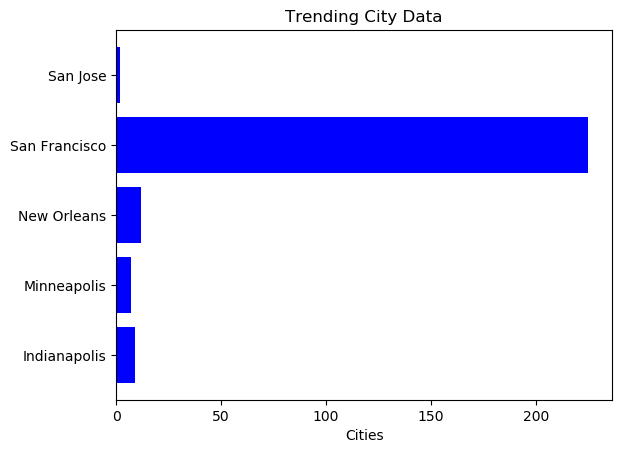

In [20]:
plt.rcdefaults()
fig, ax = plt.subplots()

Cities = city_summary_1.City[0:len(city_summary_1)]
y_pos = np.arange(len(Cities))
Totals = city_summary_1.Trending_Sum[0:len(city_summary_1)]

ax.barh(y_pos, Totals, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(Cities)
ax.set_xlabel('Cities')
ax.set_title('Trending City Data')

plt.show()

In [21]:
city_summary_1

,City,Trending_Sum
0,Indianapolis,9
1,Minneapolis,7
2,New Orleans,12
3,San Francisco,225
4,San Jose,2


<hr>

<h1 align="center">Trending City Data for Indianapolis, IN</h1>

<hr>

In [22]:
ind_city_df = group_list2[0]

In [23]:
ind_group1 = ind_city_df.groupby(['VENUE_NAME'])
ind_group_list1 = []
ind_group_list2 = []
for name, group in ind_group1:
    ind_group_list1.append(name)
    ind_group_list2.append(group)

In [24]:
ind_summary_list1 = []
ind_summary_list2 = []
ind_summary_str1 = ''
ind_summary_counter1 = 0
for item in ind_group_list1:
    ind_summary_list1.append(str(item))
    ind_summary_list1.append(len(ind_group_list2[ind_summary_counter1]))
    ind_summary_list1.append('Indianapolis')
    ind_summary_list2.append(list(ind_summary_list1))
    ind_summary_list1 = []
    ind_summary_counter1 += 1

In [25]:
ind_summary_1 = pd.DataFrame(columns=['Venue_Name', 'Trending_Sum', 'City'])

In [26]:
for row in ind_summary_list2:
    ind_summary_1 = ind_summary_1.append(pd.Series(row, index=['Venue_Name', 'Trending_Sum', 'City']), ignore_index=True)

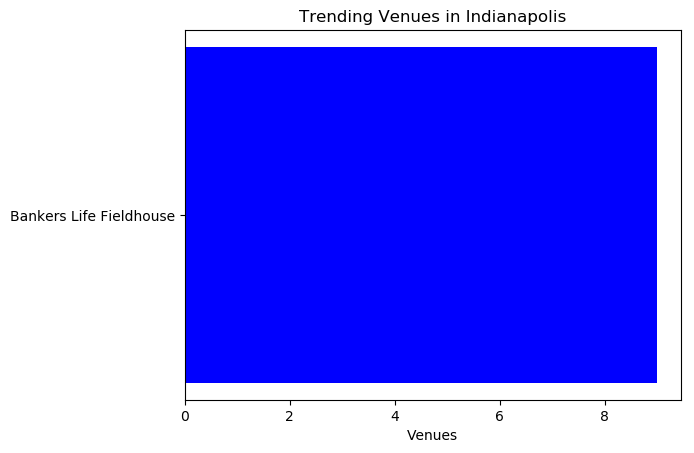

In [27]:
plt.rcdefaults()
fig, ax = plt.subplots()

Venues = ind_summary_1.Venue_Name[0:len(ind_summary_1)]
y_pos = np.arange(len(Venues))
Totals = ind_summary_1.Trending_Sum[0:len(ind_summary_1)]

ax.barh(y_pos, Totals, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(Venues)
ax.set_xlabel('Venues')
ax.set_title('Trending Venues in Indianapolis')

plt.show()

In [28]:
ind_summary_1

,Venue_Name,Trending_Sum,City
0,Bankers Life Fieldhouse,9,Indianapolis


In [29]:
ind_city_df

,VENUE_ID,CITY,LAT,LONG,VENUE_NAME,TREND_DATE,TREND_TIME
0,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,16:54:07
4,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,17:16:47
9,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,17:19:51
15,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,17:25:18
22,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,17:32:20
29,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,18:11:20
33,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,18:16:02
37,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,18:21:02
41,4ad4bff8f964a52002ea20e3,Indianapolis,39.76409464732229,-86.15550016846848,Bankers Life Fieldhouse,01/20/19,18:26:01


<hr>

<h1 align="center">Trending City Data for Minneapolis, MN</h1>

<hr>

In [30]:
minn_city_df = group_list2[1]

In [31]:
minn_group1 = minn_city_df.groupby(['VENUE_NAME'])
minn_group_list1 = []
minn_group_list2 = []
for name, group in minn_group1:
    minn_group_list1.append(name)
    minn_group_list2.append(group)

In [32]:
minn_summary_list1 = []
minn_summary_list2 = []
minn_summary_str1 = ''
minn_summary_counter1 = 0
for item in minn_group_list1:
    minn_summary_list1.append(str(item))
    minn_summary_list1.append(len(minn_group_list2[minn_summary_counter1]))
    minn_summary_list1.append('Minneapolis')
    minn_summary_list2.append(list(minn_summary_list1))
    minn_summary_list1 = []
    minn_summary_counter1 += 1

In [33]:
minn_summary_1 = pd.DataFrame(columns=['Venue_Name', 'Trending_Sum', 'City'])

In [34]:
for row in minn_summary_list2:
    minn_summary_1 = minn_summary_1.append(pd.Series(row, index=['Venue_Name', 'Trending_Sum', 'City']), ignore_index=True)

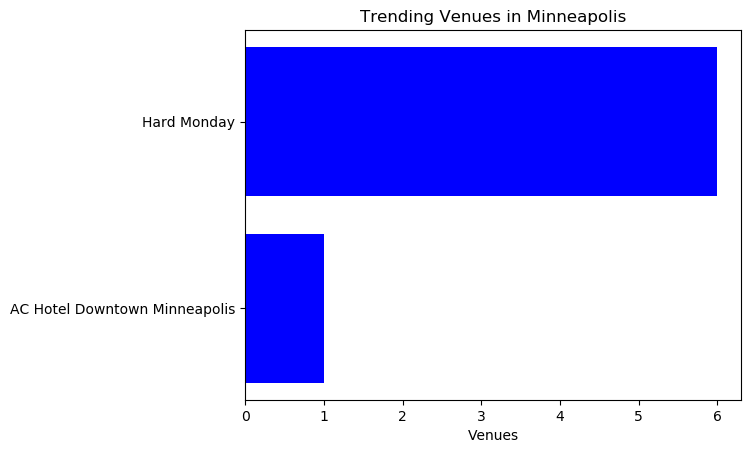

In [35]:
plt.rcdefaults()
fig, ax = plt.subplots()

Venues = minn_summary_1.Venue_Name[0:len(minn_summary_1)]
y_pos = np.arange(len(Venues))
Totals = minn_summary_1.Trending_Sum[0:len(minn_summary_1)]

ax.barh(y_pos, Totals, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(Venues)
ax.set_xlabel('Venues')
ax.set_title('Trending Venues in Minneapolis')

plt.show()


In [36]:
minn_summary_1

,Venue_Name,Trending_Sum,City
0,AC Hotel Downtown Minneapolis,1,Minneapolis
1,Hard Monday,6,Minneapolis


In [37]:
minn_city_df

,VENUE_ID,CITY,LAT,LONG,VENUE_NAME,TREND_DATE,TREND_TIME
220,4c60c443de6920a111ec9664,Minneapolis,44.97664765105814,-93.27673707725614,Hard Monday,01/20/19,22:20:59
226,4c60c443de6920a111ec9664,Minneapolis,44.97664765105814,-93.27673707725614,Hard Monday,01/20/19,22:25:58
231,4c60c443de6920a111ec9664,Minneapolis,44.97664765105814,-93.27673707725614,Hard Monday,01/20/19,22:31:03
236,4c60c443de6920a111ec9664,Minneapolis,44.97664765105814,-93.27673707725614,Hard Monday,01/20/19,22:36:02
241,4c60c443de6920a111ec9664,Minneapolis,44.97664765105814,-93.27673707725614,Hard Monday,01/20/19,22:41:00
246,4c60c443de6920a111ec9664,Minneapolis,44.97664765105814,-93.27673707725614,Hard Monday,01/20/19,22:46:01
251,58029b16d67cb63bf30ad301,Minneapolis,44.980133682004194,-93.27134549617762,AC Hotel Downtown Minneapolis,01/20/19,22:51:12


<hr>

<h1 align="center">Trending City Data for New Orleans, LA</h1>

<hr>

In [38]:
no_city_df = group_list2[2]

In [39]:
no_group1 = no_city_df.groupby(['VENUE_NAME'])
no_group_list1 = []
no_group_list2 = []
for name, group in no_group1:
    no_group_list1.append(name)
    no_group_list2.append(group)

In [40]:
no_summary_list1 = []
no_summary_list2 = []
no_summary_str1 = ''
no_summary_counter1 = 0
for item in no_group_list1:
    no_summary_list1.append(str(item))
    no_summary_list1.append(len(no_group_list2[no_summary_counter1]))
    no_summary_list1.append('New Orleans')
    no_summary_list2.append(list(no_summary_list1))
    no_summary_list1 = []
    no_summary_counter1 += 1

In [41]:
no_summary_1 = pd.DataFrame(columns=['Venue_Name', 'Trending_Sum', 'City'])

In [42]:
for row in no_summary_list2:
    no_summary_1 = no_summary_1.append(pd.Series(row, index=['Venue_Name', 'Trending_Sum', 'City']), ignore_index=True)

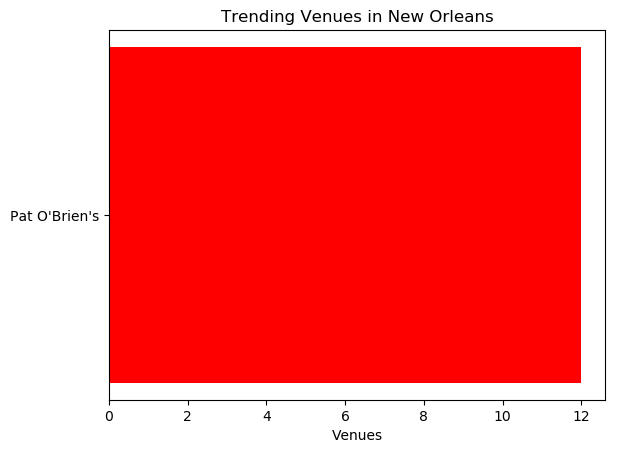

In [43]:
plt.rcdefaults()
fig, ax = plt.subplots()

Venues = no_summary_1.Venue_Name[0:len(no_summary_1)]
y_pos = np.arange(len(Venues))
Totals = no_summary_1.Trending_Sum[0:len(no_summary_1)]

ax.barh(y_pos, Totals, align='center', color='red')
ax.set_yticks(y_pos)
ax.set_yticklabels(Venues)
ax.set_xlabel('Venues')
ax.set_title('Trending Venues in New Orleans')

plt.show()

In [44]:
no_summary_1

,Venue_Name,Trending_Sum,City
0,Pat O'Brien's,12,New Orleans


In [45]:
no_city_df

,VENUE_ID,CITY,LAT,LONG,VENUE_NAME,TREND_DATE,TREND_TIME
46,4aed03f5f964a520bccc21e3,New Orleans,29.95824,-90.065279,Pat O'Brien's,01/20/19,18:26:01
51,4aed03f5f964a520bccc21e3,New Orleans,29.95824,-90.065279,Pat O'Brien's,01/20/19,18:31:05
55,4aed03f5f964a520bccc21e3,New Orleans,29.95824,-90.065279,Pat O'Brien's,01/20/19,18:36:00
59,4aed03f5f964a520bccc21e3,New Orleans,29.95824,-90.065279,Pat O'Brien's,01/20/19,18:41:02
63,4aed03f5f964a520bccc21e3,New Orleans,29.95824,-90.065279,Pat O'Brien's,01/20/19,18:46:02
72,4aed03f5f964a520bccc21e3,New Orleans,29.95824,-90.065279,Pat O'Brien's,01/20/19,19:06:00
75,4aed03f5f964a520bccc21e3,New Orleans,29.95824,-90.065279,Pat O'Brien's,01/20/19,19:11:00
78,4aed03f5f964a520bccc21e3,New Orleans,29.95824,-90.065279,Pat O'Brien's,01/20/19,19:15:59
81,4aed03f5f964a520bccc21e3,New Orleans,29.95824,-90.065279,Pat O'Brien's,01/20/19,19:21:12
84,4aed03f5f964a520bccc21e3,New Orleans,29.95824,-90.065279,Pat O'Brien's,01/20/19,19:25:58


<hr>

<h1 align="center">Trending City Data forSan Francisco, CA</h1>

<hr>

In [46]:
sf_city_df = group_list2[3]

In [47]:
sf_group1 = sf_city_df.groupby(['VENUE_NAME'])
sf_group_list1 = []
sf_group_list2 = []
for name, group in sf_group1:
    sf_group_list1.append(name)
    sf_group_list2.append(group)

In [48]:
sf_summary_list1 = []
sf_summary_list2 = []
sf_summary_str1 = ''
sf_summary_counter1 = 0
for item in sf_group_list1:
    sf_summary_list1.append(str(item))
    sf_summary_list1.append(len(sf_group_list2[sf_summary_counter1]))
    sf_summary_list1.append('San Francisco')
    sf_summary_list2.append(list(sf_summary_list1))
    sf_summary_list1 = []
    sf_summary_counter1 += 1

In [49]:
sf_summary_1 = pd.DataFrame(columns=['Venue_Name', 'Trending_Sum', 'City'])

In [50]:
for row in sf_summary_list2:
    sf_summary_1 = sf_summary_1.append(pd.Series(row, index=['Venue_Name', 'Trending_Sum', 'City']), ignore_index=True)

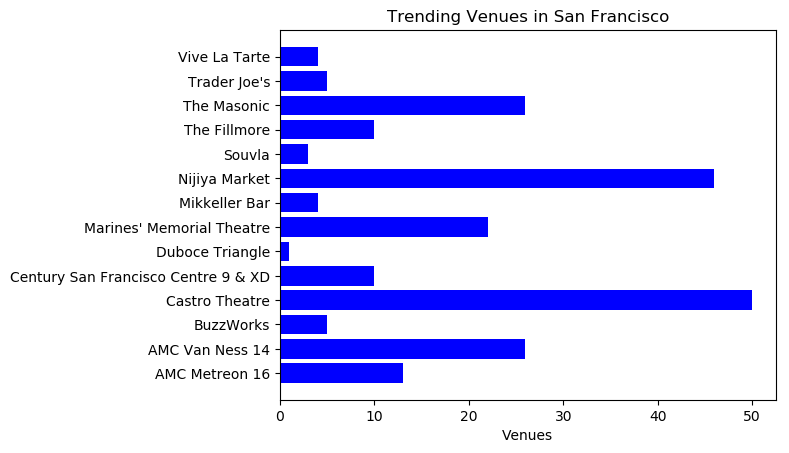

In [51]:
plt.rcdefaults()
fig, ax = plt.subplots()

Venues = sf_summary_1.Venue_Name[0:len(sf_summary_1)]
y_pos = np.arange(len(Venues))
Totals = sf_summary_1.Trending_Sum[0:len(sf_summary_1)]

ax.barh(y_pos, Totals, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(Venues)
ax.set_xlabel('Venues')
ax.set_title('Trending Venues in San Francisco')

plt.show()

In [52]:
sf_summary_1

,Venue_Name,Trending_Sum,City
0,AMC Metreon 16,13,San Francisco
1,AMC Van Ness 14,26,San Francisco
2,BuzzWorks,5,San Francisco
3,Castro Theatre,50,San Francisco
4,Century San Francisco Centre 9 & XD,10,San Francisco
5,Duboce Triangle,1,San Francisco
6,Marines' Memorial Theatre,22,San Francisco
7,Mikkeller Bar,4,San Francisco
8,Nijiya Market,46,San Francisco
9,Souvla,3,San Francisco


In [53]:
sf_city_df

,VENUE_ID,CITY,LAT,LONG,VENUE_NAME,TREND_DATE,TREND_TIME
1,4a5824e5f964a5206db71fe3,San Francisco,37.78457546024026,-122.40323635482677,AMC Metreon 16,01/20/19,16:54:07
2,57587782498e1367ff5c38ec,San Francisco,37.77124505563008,-122.41299663242239,BuzzWorks,01/20/19,16:54:07
3,55554f0a498e7ffc6883325c,San Francisco,37.77701166643817,-122.41089851840502,Vive La Tarte,01/20/19,16:54:07
5,4089ae00f964a520bff21ee3,San Francisco,37.761991717624404,-122.43496924638747,Castro Theatre,01/20/19,17:16:47
6,4a5824e5f964a5206db71fe3,San Francisco,37.78457546024026,-122.40323635482677,AMC Metreon 16,01/20/19,17:16:47
7,57587782498e1367ff5c38ec,San Francisco,37.77124505563008,-122.41299663242239,BuzzWorks,01/20/19,17:16:47
8,55554f0a498e7ffc6883325c,San Francisco,37.77701166643817,-122.41089851840502,Vive La Tarte,01/20/19,17:16:47
10,4089ae00f964a520bff21ee3,San Francisco,37.761991717624404,-122.43496924638747,Castro Theatre,01/20/19,17:19:51
11,4a5824e5f964a5206db71fe3,San Francisco,37.78457546024026,-122.40323635482677,AMC Metreon 16,01/20/19,17:19:51
12,57587782498e1367ff5c38ec,San Francisco,37.77124505563008,-122.41299663242239,BuzzWorks,01/20/19,17:19:51


<hr>

<h1 align="center">Trending City Data for San Jose, CA</h1>

<hr>

In [54]:
sj_city_df = group_list2[4]

In [55]:
sj_group1 = sj_city_df.groupby(['VENUE_NAME'])
sj_group_list1 = []
sj_group_list2 = []
for name, group in sj_group1:
    sj_group_list1.append(name)
    sj_group_list2.append(group)

In [56]:
sj_summary_list1 = []
sj_summary_list2 = []
sj_summary_str1 = ''
sj_summary_counter1 = 0
for item in sj_group_list1:
    sj_summary_list1.append(str(item))
    sj_summary_list1.append(len(sj_group_list2[sj_summary_counter1]))
    sj_summary_list1.append('San Jose')
    sj_summary_list2.append(list(sj_summary_list1))
    sj_summary_list1 = []
    sj_summary_counter1 += 1

In [57]:
sj_summary_1 = pd.DataFrame(columns=['Venue_Name', 'Trending_Sum', 'City'])

In [58]:
for row in sj_summary_list2:
    sj_summary_1 = sj_summary_1.append(pd.Series(row, index=['Venue_Name', 'Trending_Sum', 'City']), ignore_index=True)

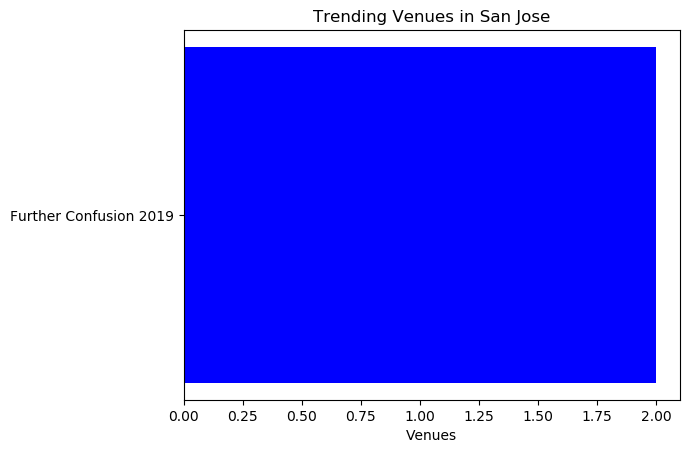

In [59]:
plt.rcdefaults()
fig, ax = plt.subplots()

Venues = sj_summary_1.Venue_Name[0:len(sj_summary_1)]
y_pos = np.arange(len(Venues))
Totals = sj_summary_1.Trending_Sum[0:len(sj_summary_1)]

ax.barh(y_pos, Totals, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(Venues)
ax.set_xlabel('Venues')
ax.set_title('Trending Venues in San Jose')

plt.show()

In [60]:
sj_summary_1

,Venue_Name,Trending_Sum,City
0,Further Confusion 2019,2,San Jose


In [61]:
sj_city_df

,VENUE_ID,CITY,LAT,LONG,VENUE_NAME,TREND_DATE,TREND_TIME
16,5c40f328345cbe002c99e458,San Jose,37.329998,-121.889275,Further Confusion 2019,01/20/19,17:25:18
23,5c40f328345cbe002c99e458,San Jose,37.329998,-121.889275,Further Confusion 2019,01/20/19,17:32:20
